In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("house_prices.csv")

# View data
print(df.head())
print(df.info())

# Check missing values
print(df.isnull().sum())

  Property_ID  Area  Bedrooms  Bathrooms  Age     Location Property_Type  \
0    PROP0001  3712         4          3   36        Rural         House   
1    PROP0002  1591         4          1   35       Suburb         House   
2    PROP0003  1646         4          3   20        Rural         Villa   
3    PROP0004  4814         1          2   13  City Center         Villa   
4    PROP0005   800         4          2   38       Suburb     Apartment   

      Price  
0  22260000  
1  16057500  
2  12730000  
3  50840000  
4  10650000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Property_ID    300 non-null    object
 1   Area           300 non-null    int64 
 2   Bedrooms       300 non-null    int64 
 3   Bathrooms      300 non-null    int64 
 4   Age            300 non-null    int64 
 5   Location       300 non-null    object
 6   Proper

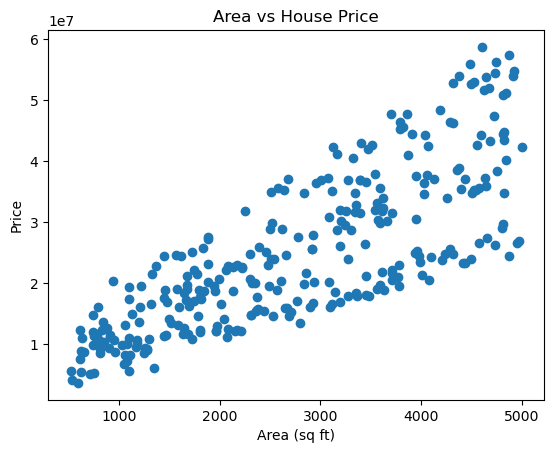

In [3]:
plt.figure()
plt.scatter(df["Area"], df["Price"])
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.title("Area vs House Price")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Features & target
X = df.drop(columns=["Price", "Property_ID"])
y = df["Price"]

# Identify column types
num_features = ["Area", "Bedrooms", "Bathrooms", "Age"]
cat_features = ["Location", "Property_Type"]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features),
        ("cat", OneHotEncoder(drop="first"), cat_features)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Create pipeline
model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regression", LinearRegression())
])

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 2188736.343703811
RMSE: 2907633.207314257
R2 Score: 0.9406371185112242


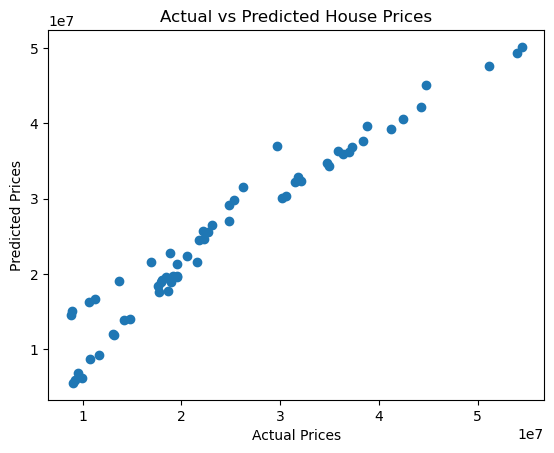

In [7]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("poly", PolynomialFeatures(degree=2)),
    ("regression", LinearRegression())
])

poly_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Area', 'Bedrooms',
                                                   'Bathrooms', 'Age']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Location',
                                                   'Property_Type'])])),
                ('poly', PolynomialFeatures()),
                ('regression', LinearRegression())])

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dt = Pipeline([
    ("preprocessing", preprocessor),
    ("model", DecisionTreeRegressor())
])

rf = Pipeline([
    ("preprocessing", preprocessor),
    ("model", RandomForestRegressor())
])

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Area', 'Bedrooms',
                                                   'Bathrooms', 'Age']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Location',
                                                   'Property_Type'])])),
                ('model', RandomForestRegressor())])